#Assignment 1: DELVE COVID data 

## Learning objectives: 

1.   Understanding the DELVE COVID-19 dataset and how it is displayed in the current notebook
2.   Modifying code to update figures
3.   Reading in, wrangling, and plotting data on your own!

# Part I: DELVE COVID-19 Data Visualization (20 pts)

###Go to https://rs-delve.github.io/data_software/global-dataset.html and read about the DELVE Global COVID-19 Dataset. 

###Open the python notebook which was used to produce the data exploration on the DELVE website ([here](https://colab.research.google.com/github/rs-delve/covid19_datasets/blob/master/Data_Exploration.ipynb)) and review the code that was used. 

###Now read the DELVE data into colab
####Hint: double clicking on the code cells in the DELVE colab, it will show you the code (i.e. the notebook is set to hide the code), you can copy that cell's content ant paste it in the code cell below

In [1]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output, display
import ipywidgets as widgets
from datetime import datetime, date, timedelta

path = 'https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv'
df = pd.read_csv(path, parse_dates=['DATE'])

###Explore the columns of the dataframe using .describe()

In [2]:
df.describe()

,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
count,139047.000000,139010.000000,138992.000000,138880.000000,138946.000000,138966.000000,138972.000000,138961.000000,138764.000000,138592.000000,1.062880e+05,1.063700e+05,138945.000000,138848.000000,138416.000000,1.062450e+05,1.324410e+05,138914.000000,141732.000000,1.249030e+05,1.248050e+05,115271.000000,115220.000000,124903.000000,124805.000000,115271.000000,115220.000000,7.572700e+04,7.363900e+04,75727.000000,73639.000000,7.651300e+04,76513.000000,1.259230e+05,123831.000000,120374.000000,119637.000000,125923.000000,125923.000000,0.0,0.0,0.0,91605.000000,91619.000000,91232.000000,92067.000000,92205.000000,91740.000000,46128.000000,20088.000000,46128.000000,119634.000000,107442.000000,9.067800e+04,1.242060e+05,3924.000000,564.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000
mean,1.537530,1.375081,1.344351,2.567079,0.530177,0.990796,0.790677,2.367254,0.782018,0.876176,1.430008e+08,8.488716e+06,1.798316,1.941015,1.283782,7.975346e+06,6.011165e+05,50.701809,1.553150,6.747346e+05,2.985925e+03,15620.637255,48.721359,24918.404699,131.599528,460.081329,1.560485,1.501761e+07,5.730526e+04,630.522623,2.569546,6.097632e+04,2.742757,4.479907e+07,477.349435,30.567449,20169.072808,344.254290,292.916346,NaN,NaN,NaN,-12.681611,8.775942,7.665622,-18.286454,-17.246440,6.681796,112.610801,88.809425,112.108196,2.962038,21.803546,1.540574e+07,6.976019e+06,117.939596,818.808852,0.000036,0.011382,188.931462,19.297962,15.604800,23.355435,3.494217
std,1.133889,0.975781,0.788397,1.536371,0.684798,0.929777,0.897415,1.227666,0.767713,0.857631,1.113385e+10,2.560672e+09,0.546855,0.980728,0.782420,9.234216e+08,6.213652e+07,24.025024,1.322597,3.114258e+06,1.840070e+04,59555.013267,204.375843,41625.573215,504.949567,739.461897,4.098715,5.623917e+07,1.999221e+05,1526.556936,7.860154,1.938554e+05,7.051692,1.573828e+08,2274.918150,9.295455,21340.777498,204.450046,232.214196,NaN,NaN,NaN,28.793027,33.008606,51.897772,29.145695,20.704342,8.815473,60.695662,46.357920,77.261631,2.484911,9.825280,4.529270e+07,2.101725e+07,249.098170,1742.175371,0.000068,0.005347,64.843807,9.014941,9.367133,9.206467,1.834309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e-02,-2.000000e-02,0.000000,0.000000,0.000000,-1.000000e-02,-7.000000e-02,0.000000,0.000000,1.000000e+00,-7.434700e+04,1.000000,-1918.000000,0.001000,-3125.829000,0.001000,-75.911000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,3.401000e+04,0.137000,15.100000,661.240000,-192.000000,-739.000000,NaN,NaN,NaN,-100.000000,-100.000000,-100.00000

###Now create a new dataframe summarizing average values for each country in each column and display it in the notebook



In [3]:
df_mean = df.groupby(['country_name']).mean()
df_mean

,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.373819,1.442645,1.143050,0.945946,0.662162,0.475676,0.499325,1.630229,0.000000,0.043972,0.000000e+00,260068.259386,1.020243,1.620783,0.526749,424876.706485,1.632948e+05,34.883135,0.000000,74675.424328,229.294201,3382.689249,10.910162,1874.598272,5.756044,84.916585,0.273837,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,1803.987,353.0,325.0,NaN,NaN,NaN,26.723173,53.412131,11.197605,-14.842105,-8.904192,1.681138,NaN,NaN,NaN,0.39,NaN,4221532.0,9292896.0,NaN,NaN,0.000021,0.005995,185.438330,13.614276,7.350657,19.730927,2.427583
Albania,1.727882,1.344504,1.573727,3.176944,0.356568,1.581769,0.374833,1.651475,0.950402,1.068365,9.231948e+05,0.000000,1.593834,1.848525,1.325301,45375.218150,1.037594e+04,51.914692,0.000000,89167.551227,369.034632,1530.740955,4.824891,31037.103951,128.452186,532.814495,1.679337,5.155760e+05,2213.726885,179.459765,0.770542,2223.390805,0.773912,2872934.0,104.871,38.0,11803.431,339.5,337.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.917272,NaN,157.522419,2.89,29.2,NaN,302886.0,NaN,NaN,0.000031,0.007237,179.588922,13.379447,8.698013,18.531704,2.181171
Algeria,1.361673,1.495277,1.499325,3.365722,1.264507,1.597841,1.017544,2.832659,0.406208,1.205128,1.280026e+06,0.000000,1.773279,1.315789,1.425101,583184.257603,2.300720e+06,59.411822,2.456693,105729.830028,355.203966,3092.891304,9.515942,2369.740602,7.961235,69.321506,0.213257,NaN,NaN,NaN,NaN,NaN,NaN,44616626.0,17.348,29.1,13913.839,352.5,336.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,18.8,2767661.0,7766182.0,NaN,NaN,0.000014,0.008208,193.742416,17.430347,12.708320,22.455916,3.471161
Andorra,1.159420,1.588933,1.358366,2.839262,0.859025,0.226614,0.056653,1.607378,1.810277,1.283267,7.608472e+05,817787.780656,1.602108,2.367589,1.610013,4520.319828,0.000000e+00,44.888116,2.574803,9518.735714,50.939828,94.713235,0.213235,123054.214583,658.528691,1224.412929,2.756659,1.843159e+05,NaN,2382.759031,NaN,460.615385,5.954595,77354.0,163.755,NaN,NaN,349.5,329.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.8,NaN,NaN,NaN,NaN,0.000030,0.006175,177.429576,6.740901,1.786306,11.818287,1.703644
Angola,1.255348,1.719251,1.347594,2.995989,0.871658,1.084225,1.485294,2.858289,0.159517,0.256267,1.570681e+04,0.000000,1.662651,2.045455,0.073770,419580.419580,1.178046e+05,58.348583,1.661417,27733.020528,143.806452,684.934621,2.815750,817.272909,4.237862,20.184547,0.082868,1.336591e+06,3949.200000,39.388286,0.116400,3650.857143,0.107714,33933611.0,23.890,16.8,5819.495,340.5,331.5,NaN,NaN,NaN,6.847125,15.784011,27.767442,-7.24273

###Copy the code which generates the "Timline of NPI Introduction for Selected Countries" graph and comment each command describing what was done, e.g.:



```
## add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
```



###Next, change the colors on the graph to group NPIs with the same color in the following way: 
* all canceling/closures (e.g. "npi_cancel_public_events", "npi_school_closing","npi_close_public_transport", "npi_workplace_closing")
* all money-related interventions (e.g. "npi_income_support")
* all testing and PPE interventions (e.g. "npi_contact_tracing", "npi_masks")
* remaining NPIs (e.g. "npi_internal_movement_restrict")

######Hint: create a new column in plot_df that you can use for the 'hue' argument in the sns.relplot function

###Comment the code you added to make this change

### You can include your comments and change in the cell below.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


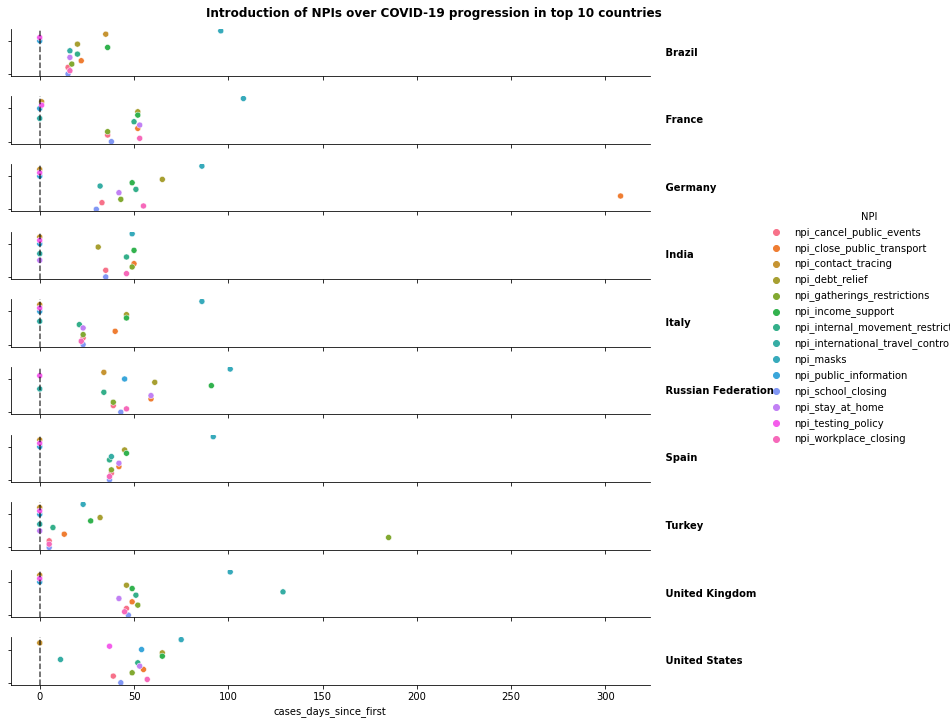

In [4]:
#@title Timeline Plot
# For part1: comment the original code:
## construct a list containing names of all variables related to npi
npis = [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_gatherings_restrictions',
        'npi_close_public_transport',
        'npi_stay_at_home',
        'npi_internal_movement_restrictions',
        'npi_international_travel_controls',
        'npi_income_support',
        'npi_debt_relief',
        'npi_public_information',
        'npi_testing_policy',
        'npi_contact_tracing',
        'npi_masks',
]

## wrap (the 10 countries with the most COVID 19 total cases)
## into an Index object (countries), and use country_name label as index
countries = df.groupby('country_name').cases_total.max().nlargest(10).index

## select part of the data and reshape it into a long format: 
## use country name and 'cases_days_since_first' as identifier variables,
## rename the measured variable (all variables in npis) column as 'NPI',
## store the reshaped dataframe into plot_df
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')

## sort plot_df first by country name in ascending order; 
## then, for each country name, sort 'cases_days_since_first' in ascending order;
## note: NaN values will be at the last
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])

## select rows in plot_df with value above 0, then group these rows by country name and NPI,
## finally present the min value of each group (note: do not use group label as index)
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

## add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

## store the relational scatter plot of plot_df in g: one plot for each country,
g = sns.relplot(data=plot_df,   # data is plot_df
                x='cases_days_since_first',   # x-axis is cases_day_since_first
                y='value', # y-axis is value
                hue='NPI',  # map a color to each NPI category
                row='country_name', # row is country: each country has a plot in a row
                kind='scatter',   # scatter plot
                height=1,   # height = 1 inch for each facet
                aspect=10,  # aspect ratio = 10 for each facet
                marker='o', # each data point is a small circle

                # titles are at the margin, not the top;
                # display legend;
                # remove right and top spine for each subplot.
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))


for ax in g.axes.flat:  # for each axes in the 1D iterator
  txt = ax.texts[0] # txt = text element of each subplot, 
  # which in the case is the position and the content of the margin title
  
  ## add text for axes:  
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1], # position unchanged
          txt.get_text().split('=')[1], # the content is country name only
          transform=ax.transAxes, # coordinate system transformation
          va='center',  # vertical alignment = center for the margin title
          fontweight='bold')  # set font as bold
  ax.texts[0].remove()  # remove the original text element (original title) 
  ax.set_ylabel(None) # remove y label
  ax.set_yticklabels([])  # set each y-tick label with no string label
  ax.axvline(0, ls='--', c='k', alpha=0.7)  # add a black dashed vertical line at x=0, and its transparency = 0.7

## add a centered title at the top to the figure in g
g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

leg = g._legend # store the legend of the scatter plot into leg
leg.set_bbox_to_anchor([1.05, 0.55]) # set the position of the legend

plt.subplots_adjust(top=0.95) # set the position of the top edge of the subplot
plt.show()  # show the plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


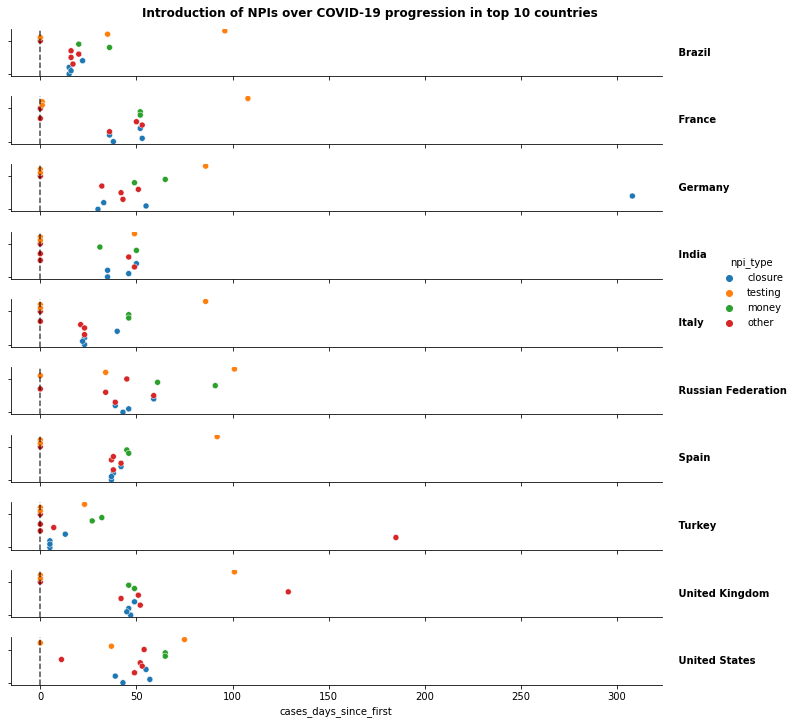

In [5]:
# For part2: change color of group NPIs
# Note only lines got changed has comments

## store groups of NPIs in a dict
npi_by_group = {
    'closure': ["npi_cancel_public_events", 
                   "npi_school_closing",
                   "npi_close_public_transport", 
                   "npi_workplace_closing"],
    'money': ['npi_income_support', 'npi_debt_relief'],
    'testing': ['npi_testing_policy', 'npi_contact_tracing', 'npi_masks'],
    'other': ['npi_internal_movement_restrictions', 
                  'npi_international_travel_controls',
                  'npi_gatherings_restrictions', 
                  'npi_stay_at_home', 
                  'npi_public_information']
}

## create a new column called npi_type based on npi's group
plot_df['npi_type'] = np.select(
    [
     plot_df['NPI'].isin(npi_by_group['closure']),
     plot_df['NPI'].isin(npi_by_group['money']),
     plot_df['NPI'].isin(npi_by_group['testing']),
     plot_df['NPI'].isin(npi_by_group['other'])
    ],
    ['closure', 'money', 'testing', 'other']
)

g = sns.relplot(data=plot_df, 
                x='cases_days_since_first', 
                y='value', 
                hue='npi_type',   # map a color to each npi_type
                row='country_name', 
                kind='scatter', 
                height=1, 
                aspect=10, 
                marker='o', 
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))

for ax in g.axes.flat:
  txt = ax.texts[0]
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
          txt.get_text().split('=')[1],
          transform=ax.transAxes,
          va='center',
          fontweight='bold')
  ax.texts[0].remove()
  ax.set_ylabel(None)
  ax.set_yticklabels([])
  ax.axvline(0, ls='--', c='k', alpha=0.7)

g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

leg = g._legend
leg.set_bbox_to_anchor((0.8, 0.45, 0.2, 0.3))

plt.subplots_adjust(top=0.95)
plt.show()

###In the DELVE data exploration, they add a widget to allow the user to select only data from a specific country to display. Let's add a widget here and only show the data from one country. It's okay if your country-specific graph is simpler than the ones above (e.g. no dashed horizontal line). 

Dropdown(description='Country:', index=8, options=(('Brazil', 'Brazil'), ('France', 'France'), ('Germany', 'Ge…

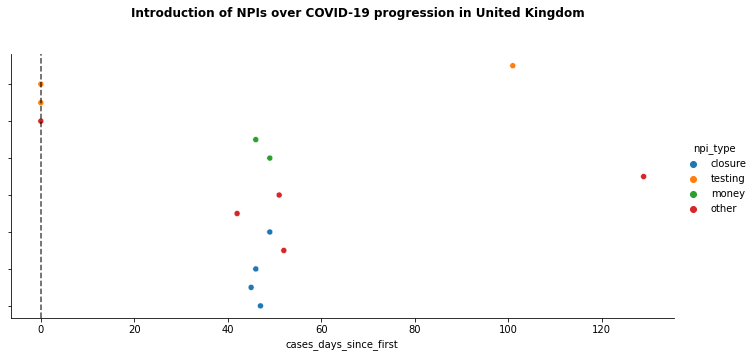

In [6]:
## the add_widget function from DELVE data exploration
def add_widget(country):
  country_widget = widgets.Dropdown(
      options=sorted([(c, c) for c in plot_df.country_name.unique()]),
      value=country,
      description='Country:',
  )

  country_widget.observe(lambda d: plot_country(d['new']), 'value')
  display(country_widget)

## plot NIP data for a specific country
def plot_country(country):
  clear_output()
  add_widget(country)
  global plot_df

  country_plt = sns.relplot(data=plot_df[plot_df['country_name'] == country], 
                x='cases_days_since_first', 
                y='value', 
                hue='npi_type',   # map a color to each npi_type 
                kind='scatter', 
                height=5, 
                aspect=2, 
                marker='o', 
                facet_kws=dict(legend_out=True, despine=True))

  ax = country_plt.axes.flat[0]
  ax.set_ylabel(None)
  ax.set_yticklabels([])
  ax.axvline(0, ls='--', c='k', alpha=0.7)

  country_plt.fig.suptitle(f'Introduction of NPIs over COVID-19 progression in {country}', fontweight='bold')

  plt.subplots_adjust(top=0.85)
  plt.show()

plot_country('United Kingdom')

# Part II: Create your own COVID-19 Data Visualization
* 20 pts for the code + description in this notebook
* 20 pts for the 2 pg summary

###Now find a COVID-19 dataset available online on your own.  Feel free to use whatever data you would like.  If you are having trouble finding data, you can take a look at the sources below:

* The U of T library COVID-19 data resource list: https://mdl.library.utoronto.ca/covid-19/data.

* Google open COVID-19 data repository: https://health.google.com/covid-19/open-data/raw-data.

* Ontario data catalog: https://data.ontario.ca/en/organization/health.

* Kaggle: https://www.kaggle.com. 

###Read the data into this notebook and create a figure with a widget that allows users to interact with the graph.  Also, write a caption in the notebook describing the figure you've created.



In [7]:
# Prepare data

# read data
df2 = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v2/vaccination-search-insights.csv', sep = ',')

# select only data from Canada
df2 = df2[(df2['key'].str.startswith('CA'))]

# replace null value with mean value before 2021-02-08 (see reasoning in report)
df2 = df2.fillna(df2[df2['date'] <= '2021-02-08'].mean())

# melt plot_df2: use key (region code) and date as identifiers
plot_df2 = df2.melt(id_vars=['key', 'date'], var_name='Vac-Search')

In [8]:
# map search-type widget options to col name in plot_df2
map_search_widget_names = {
  'General': 'sni_covid19_vaccination',
  'Intent': 'sni_vaccination_intent',
  'Safety': 'sni_safety_side_effects'
}

In [9]:
# 2 widgets: one for selecting vaccination search type,  the other one for select region
def add_vaccine_widget(search_type, selected_region):
  # create search_type widget
  search_type_widget = widgets.Dropdown(
      options=sorted(map_search_widget_names.keys()),
      value=search_type,
      description='Search Type: '
  )

  # create region selection widget
  select_region_widget = widgets.SelectMultiple(
    options=plot_df2.key.unique().tolist(),
    value=selected_region,
    rows=9,
    description='Region: '
    )
 
  # observe changes
  search_type_widget.observe(lambda d: plot_search(d['new'], select_region_widget.value), 'value')
  select_region_widget.observe(lambda d: plot_search(search_type_widget.value, d['new']), 'value')

  # display widgets
  display(search_type_widget)
  display(select_region_widget)


Dropdown(description='Search Type: ', options=('General', 'Intent', 'Safety'), value='General')

SelectMultiple(description='Region: ', index=(0, 1, 2, 3, 4, 5, 6, 7, 8), options=('CA', 'CA_AB', 'CA_BC', 'CA…

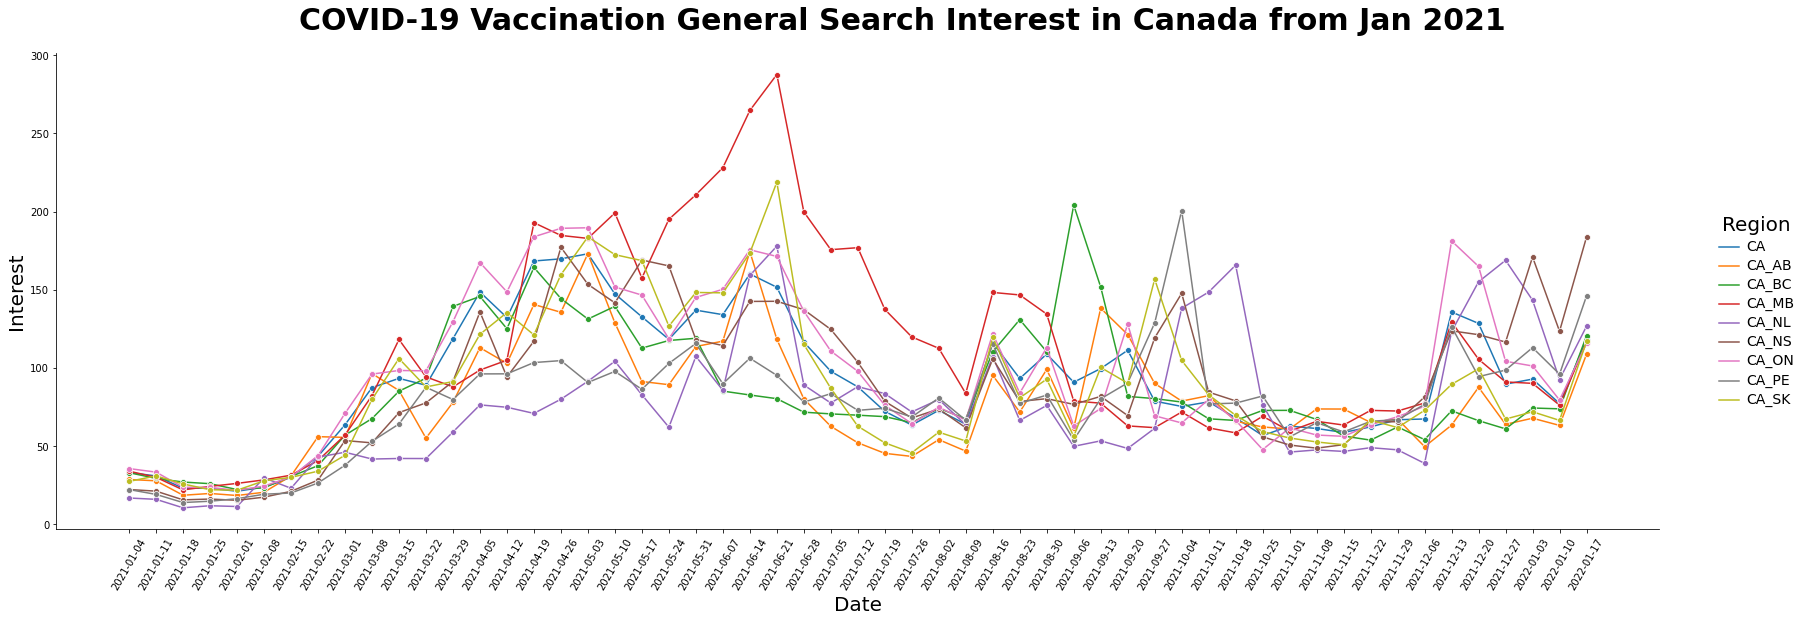

In [10]:
# plot vaccination search data
def plot_search(search_type, selected_region):
  print(search_type, selected_region)
  clear_output()
  add_vaccine_widget(search_type, selected_region)
  search_plot = sns.relplot(data=plot_df2[(plot_df2['Vac-Search'] == map_search_widget_names[search_type]) & 
                                          (plot_df2['key'].isin(selected_region))],
                  x='date',
                  y='value',
                  hue='key',
                  kind='line',
                  height=8,
                  aspect=3,
                  marker='o', 
                  facet_kws=dict(margin_titles=True, legend_out=True, despine=True))
  
  # add title
  search_plot.fig.suptitle(f'COVID-19 Vaccination {search_type} Search Interest in Canada from Jan 2021', fontweight='bold', fontsize=30)
  
  # modify styles of the plot
  (search_plot.set_xticklabels(rotation=60)
              .set_axis_labels("Date", "Interest", fontsize=20)
              ._legend.set_title("Region"))
  
  plt.subplots_adjust(top=0.9)
  plt.setp(search_plot._legend.get_texts(), fontsize=14)
  plt.setp(search_plot._legend.get_title(), fontsize=20)
  plt.show()

# initially, plot all searches related to COVID-19 vaccination  in all CA provinces
plot_search('General', plot_df2.key.unique().tolist())